In [1]:
import numpy as np
from scipy.spatial import cKDTree

from mmtwfs.wfs import WFSFactory, aperture_distance

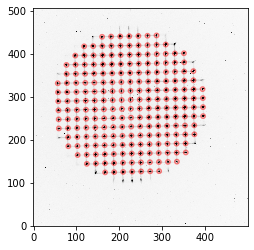

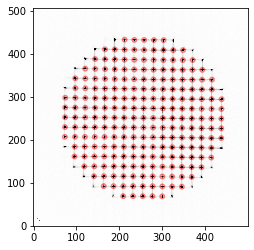

In [2]:
mmirs = WFSFactory(wfs="mmirs")

In [3]:
mmirs_file = "/home/tim/MMT/mmtwfs/mmtwfs/data/test_data/mmirs_wfs_0150.fits"

2.3 s ± 103 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


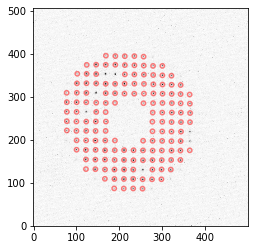

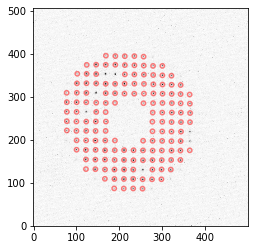

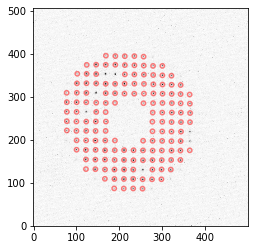

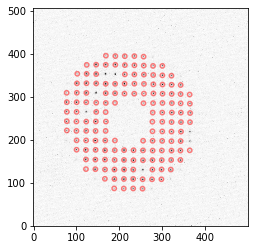

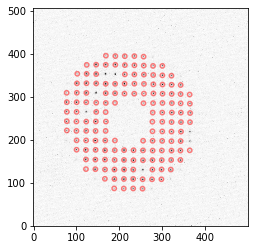

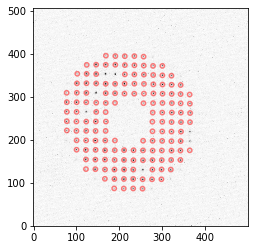

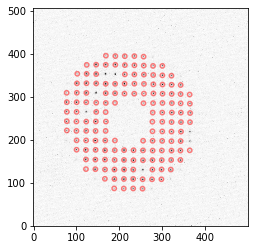

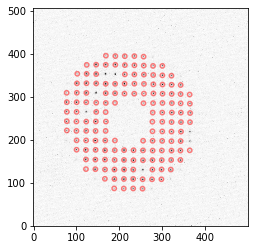

In [5]:
%%timeit
results = mmirs.measure_slopes(mmirs_file, plot=False)
zresults = mmirs.fit_wavefront(results, plot=False)

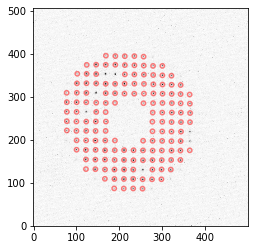

         1715348 function calls (1649268 primitive calls) in 2.799 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    27101    0.396    0.000    0.406    0.000 zernike.py:81(R_mn)
      207    0.379    0.002    0.379    0.002 functional_models.py:367(evaluate)
    13561    0.119    0.000    0.119    0.000 zernike.py:156(theta_m)
    26237    0.114    0.000    0.114    0.000 zernike.py:330(noll_to_zernike)
    13540    0.098    0.000    0.330    0.000 zernike.py:121(dR_drho)
    13540    0.095    0.000    0.095    0.000 zernike.py:180(dtheta_dphi)
     6770    0.081    0.000    0.555    0.000 zernike.py:240(dZ_dx)
     6770    0.077    0.000    0.216    0.000 zernike.py:285(dZ_dy)
        1    0.064    0.064    0.065    0.065 {astroscrappy.astroscrappy.detect_cosmics}
        2    0.047    0.023    0.047    0.023 {astropy.timeseries.periodograms.lombscargle.implementations.cython_impl.lombscargle_cython}
58222/41508    0.04

In [6]:
%%prun
results = mmirs.measure_slopes(mmirs_file, plot=False)
zresults = mmirs.fit_wavefront(results, plot=False)

In [11]:
x = np.arange(250)
y = np.arange(250)
rx = np.arange(300) + 10
ry = np.arange(300) + 3
a1 = np.array([x, y])
a2 = np.array([rx, ry])
ad = aperture_distance(x, y, rx, ry)
ad

7.143767698905107

In [37]:
def aperture_distance(refx, refy, spotx, spoty):
    """
    Calculate the sum of the distances between each reference aperture and the closest measured spot position.
    This total distance is the statistic to minimize when fitting the reference aperture grid to the data.
    """
    tot_dist = 0.0
    refs = np.array([refx, refy]).transpose()
    spots = np.array([spotx, spoty]).transpose()
    tree = cKDTree(refs)
    mindist, _ = tree.query(spots)
    tot_dist = mindist.sum()
    return np.log(tot_dist)

In [38]:
%%timeit
d = aperture_distance(rx, ry, x, y)

161 µs ± 1.19 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [31]:
refs = np.array([rx, ry]).transpose()
spots = np.array([x, y]).transpose()

In [32]:
tree = cKDTree(refs)

In [34]:
mindist, minid = tree.query(spots)

In [36]:
np.log(mindist.sum())

7.143767698905107